# Problem Statement
* The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette.
* The vehicle may be viewed from one of many different angles.

## 1. Import Libraries and load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
vehicleData = pd.read_csv("vehicle.csv")

## 2. Shape of the dataset

In [3]:
vehicleData.shape

(846, 19)

In [4]:
vehicleData.isnull().sum() # Check if there are any null values in data set

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

> There are many missing values.

In [5]:
vehicleData.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107          NaN                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0           NaN   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            1

## 3. Univariate analysis

### 3.1 Data types and description

In [6]:
vehicleData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [7]:
vehicleData['class'] = vehicleData['class'].astype('category')
vehicleData['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

In [8]:
vehicleData.describe().transpose()

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

### 3.2 Find missing values

In [9]:
vehicleData[pd.isnull(vehicleData['circularity'])]

compactness  circularity  distance_circularity  radius_ratio  \
5            107          NaN                 106.0         172.0   
105          108          NaN                 103.0         202.0   
118           85          NaN                   NaN         128.0   
266           86          NaN                  65.0         116.0   
396          108          NaN                 106.0         177.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
5                    50.0                        6          255.0   
105                  64.0                       10          220.0   
118                  56.0                        8          150.0   
266                  53.0                        6          152.0   
396                  51.0                        5          256.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
5             26.0                    28.0                        169   
105           30.0                    25.0                        168   
118           46.0                    19.0                        144   
266           45.0                    19.0                        141   
396           26.0                    28.0                        170   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
5              280.0              957.0                      264.0   
105              NaN              711.0                      214.0   
118            168.0              324.0                      173.0   
266            175.0              335.0                        NaN   
396            285.0              966.0                      261.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
5                           85.0             5.0               9.0   
105                         73.0            11.0               NaN   
118                         82.0             9.0              14.0   
266                         85.0             5.0               4.0   
396                         87.0            11.0               2.0   

     skewness_about.2  hollows_ratio class  
5               181.0            183   bus  
105             188.0            199   car  
118             180.0            184   bus  
266             179.0            183   bus  
396             182.0            181   bus

In [10]:
vehicleData[pd.isnull(vehicleData['distance_circularity'])]

compactness  circularity  distance_circularity  radius_ratio  \
35           100         46.0                   NaN         172.0   
118           85          NaN                   NaN         128.0   
207           85         42.0                   NaN         121.0   
319          102         51.0                   NaN         194.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
35                   67.0                        9          157.0   
118                  56.0                        8          150.0   
207                  55.0                        7          149.0   
319                  60.0                        6          220.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
35            43.0                    20.0                        150   
118           46.0                    19.0                        144   
207           46.0                    19.0                        146   
319           30.0                    25.0                        162   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
35             170.0              363.0                      184.0   
118            168.0              324.0                      173.0   
207            167.0              323.0                        NaN   
319            247.0              731.0                      209.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
35                          67.0            17.0               7.0   
118                         82.0             9.0              14.0   
207                         85.0             1.0               6.0   
319                         80.0             7.0               7.0   

     skewness_about.2  hollows_ratio class  
35              192.0            200   van  
118             180.0            184   bus  
207             179.0            182   bus  
319             188.0            186   bus

In [11]:
vehicleData[pd.isnull(vehicleData['radius_ratio'])]

compactness  circularity  distance_circularity  radius_ratio  \
9             93         44.0                  98.0           NaN   
78           104         52.0                  94.0           NaN   
159           91         45.0                  75.0           NaN   
287           88         43.0                  84.0           NaN   
345          101         54.0                 106.0           NaN   
467           96         54.0                 104.0           NaN   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
9                    62.0                       11          183.0   
78                   66.0                        5          208.0   
159                  57.0                        6          150.0   
287                  55.0                       11          154.0   
345                  57.0                        7          236.0   
467                  58.0                       10          215.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
9             36.0                    22.0                        146   
78            31.0                    24.0                        161   
159           44.0                    19.0                        146   
287           44.0                    19.0                        150   
345           28.0                    26.0                        164   
467           31.0                    24.0                        175   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
9              202.0              505.0                      152.0   
78             227.0              666.0                      218.0   
159            170.0              335.0                      180.0   
287            174.0              350.0                      164.0   
345            256.0              833.0                      253.0   
467            221.0              682.0                      222.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
9                           64.0             4.0              14.0   
78                          76.0            11.0               4.0   
159                         66.0            16.0               2.0   
287                         73.0             6.0               2.0   
345                         81.0             6.0              14.0   
467                         75.0            13.0              23.0   

     skewness_about.2  hollows_ratio class  
9               195.0            204   car  
78              193.0            191   bus  
159             193.0            198   car  
287             185.0            196   van  
345             185.0            185   bus  
467             186.0            194   car

In [12]:
vehicleData[pd.isnull(vehicleData['pr.axis_aspect_ratio'])]

compactness  circularity  distance_circularity  radius_ratio  \
19           101         56.0                 100.0         215.0   
222          100         50.0                  81.0         197.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
19                    NaN                       10          208.0   
222                   NaN                        6          186.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
19            32.0                    24.0                        169   
222           34.0                    22.0                        158   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
19             227.0              651.0                      223.0   
222            206.0              531.0                      198.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
19                          74.0             6.0               5.0   
222                         74.0             NaN               1.0   

     skewness_about.2  hollows_ratio class  
19              186.0            193   car  
222             197.0            198   bus

In [13]:
vehicleData[pd.isnull(vehicleData['scatter_ratio'])]

compactness  circularity  distance_circularity  radius_ratio  \
249           85         34.0                  53.0         127.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
249                  58.0                        6            NaN   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
249           58.0                    17.0                        121   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
249            137.0              197.0                      127.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
249                         70.0             NaN              20.0   

     skewness_about.2  hollows_ratio class  
249             185.0            189   car

In [14]:
vehicleData[pd.isnull(vehicleData['elongatedness'])]

compactness  circularity  distance_circularity  radius_ratio  \
215           90         39.0                  86.0         169.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
215                  62.0                        7          162.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
215            NaN                    20.0                        131   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
215            194.0              388.0                      147.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
215                         74.0             1.0              22.0   

     skewness_about.2  hollows_ratio class  
215             185.0            191   car

In [15]:
vehicleData[pd.isnull(vehicleData['pr.axis_rectangularity'])]

compactness  circularity  distance_circularity  radius_ratio  \
70            96         55.0                  98.0         161.0   
237           85         45.0                  65.0         128.0   
273           96         45.0                  80.0         162.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
70                   54.0                       10          215.0   
237                  56.0                        8          151.0   
273                  63.0                        9          146.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
70            31.0                     NaN                        175   
237           45.0                     NaN                        145   
273           46.0                     NaN                        148   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
70             226.0              683.0                      221.0   
237            170.0              332.0                      186.0   
273            161.0              316.0                      161.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
70                          76.0             3.0               6.0   
237                         81.0             1.0              10.0   
273                         64.0             5.0              10.0   

     skewness_about.2  hollows_ratio class  
70              185.0            193   car  
237             179.0            184   bus  
273             199.0            207   van

In [16]:
vehicleData[pd.isnull(vehicleData['scaled_variance'])]

compactness  circularity  distance_circularity  radius_ratio  \
105          108          NaN                 103.0         202.0   
372           97         47.0                  87.0         164.0   
522           89         36.0                  69.0         162.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
105                  64.0                       10          220.0   
372                  64.0                        9          156.0   
522                  63.0                        6          140.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
105           30.0                    25.0                        168   
372           43.0                    20.0                        149   
522           48.0                    18.0                        131   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
105              NaN              711.0                      214.0   
372              NaN              359.0                      182.0   
522              NaN              291.0                      126.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
105                         73.0            11.0               NaN   
372                         68.0             1.0              13.0   
522                         66.0             1.0              38.0   

     skewness_about.2  hollows_ratio class  
105             188.0            199   car  
372             192.0            202   van  
522             193.0            204   car

In [17]:
vehicleData[pd.isnull(vehicleData['scaled_variance.1'])]

compactness  circularity  distance_circularity  radius_ratio  \
308          109         51.0                 100.0         197.0   
496          106         55.0                  98.0         224.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
308                  59.0                       10          192.0   
496                  68.0                       11          215.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
308           34.0                    22.0                        161   
496           31.0                    24.0                        170   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
308            210.0                NaN                      195.0   
496            222.0                NaN                      214.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
308                         64.0            14.0               3.0   
496                         68.0             2.0              29.0   

     skewness_about.2  hollows_ratio class  
308             196.0            202   car  
496             189.0            201   car

In [18]:
vehicleData[pd.isnull(vehicleData['scaled_radius_of_gyration'])]

compactness  circularity  distance_circularity  radius_ratio  \
207           85         42.0                   NaN         121.0   
266           86          NaN                  65.0         116.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
207                  55.0                        7          149.0   
266                  53.0                        6          152.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
207           46.0                    19.0                        146   
266           45.0                    19.0                        141   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
207            167.0              323.0                        NaN   
266            175.0              335.0                        NaN   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
207                         85.0             1.0               6.0   
266                         85.0             5.0               4.0   

     skewness_about.2  hollows_ratio class  
207             179.0            182   bus  
266             179.0            183   bus

In [19]:
vehicleData[pd.isnull(vehicleData['scaled_radius_of_gyration.1'])]

compactness  circularity  distance_circularity  radius_ratio  \
66            81         43.0                  68.0         125.0   
77            86         40.0                  62.0         140.0   
192           93         43.0                  76.0         149.0   
329           89         38.0                  80.0         169.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
66                   57.0                        8          149.0   
77                   62.0                        7          150.0   
192                  57.0                        7          149.0   
329                  59.0                        7          161.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
66            46.0                    19.0                        146   
77            45.0                    19.0                        133   
192           44.0                    19.0                        143   
329           41.0                    20.0                        131   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
66             169.0              323.0                      172.0   
77             165.0              330.0                      173.0   
192            172.0              335.0                      176.0   
329            186.0              389.0                      137.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
66                           NaN             NaN              18.0   
77                           NaN             2.0               3.0   
192                          NaN            14.0               0.0   
329                          NaN             5.0              15.0   

     skewness_about.2  hollows_ratio class  
66              179.0            184   bus  
77              180.0            185   car  
192             189.0            194   car  
329             192.0            197   car

In [20]:
vehicleData[pd.isnull(vehicleData['skewness_about'])]

compactness  circularity  distance_circularity  radius_ratio  \
66            81         43.0                  68.0         125.0   
141           81         42.0                  63.0         125.0   
177           89         44.0                  72.0         160.0   
222          100         50.0                  81.0         197.0   
249           85         34.0                  53.0         127.0   
285           89         48.0                  85.0         189.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
66                   57.0                        8          149.0   
141                  55.0                        8          149.0   
177                  66.0                        7          144.0   
222                   NaN                        6          186.0   
249                  58.0                        6            NaN   
285                  64.0                        8          169.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
66            46.0                    19.0                        146   
141           46.0                    19.0                        145   
177           46.0                    19.0                        147   
222           34.0                    22.0                        158   
249           58.0                    17.0                        121   
285           39.0                    20.0                        153   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
66             169.0              323.0                      172.0   
141            166.0              320.0                      172.0   
177            166.0              312.0                      169.0   
222            206.0              531.0                      198.0   
249            137.0              197.0                      127.0   
285            188.0              427.0                      190.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
66                           NaN             NaN              18.0   
141                         86.0             NaN               7.0   
177                         69.0             NaN               1.0   
222                         74.0             NaN               1.0   
249                         70.0             NaN              20.0   
285                         64.0             NaN               5.0   

     skewness_about.2  hollows_ratio class  
66              179.0            184   bus  
141             179.0            182   bus  
177             191.0            198   bus  
222             197.0            198   bus  
249             185.0            189   car  
285             195.0            201   car

In [21]:
vehicleData[pd.isnull(vehicleData['skewness_about.1'])]

compactness  circularity  distance_circularity  radius_ratio  \
105          108          NaN                 103.0         202.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
105                  64.0                       10          220.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
105           30.0                    25.0                        168   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
105              NaN              711.0                      214.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
105                         73.0            11.0               NaN   

     skewness_about.2  hollows_ratio class  
105             188.0            199   car

In [22]:
vehicleData[pd.isnull(vehicleData['skewness_about.2'])]

compactness  circularity  distance_circularity  radius_ratio  \
419           93         34.0                  72.0         144.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
419                  56.0                        6          133.0   

     elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
419           50.0                    18.0                        123   

     scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
419            158.0              263.0                      125.0   

     scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
419                         63.0             5.0              20.0   

     skewness_about.2  hollows_ratio class  
419               NaN            206   car

> The missing values seem random and the column values are continuous, so I replace them with median values.

### 3.3 Replace missing values with median

In [23]:
vehicleData.fillna(vehicleData.median(), inplace=True)
vehicleData.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

### 3.4 Find duplicates

In [24]:
dups = vehicleData.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


### 3.5 Find outliers

In [25]:
X = vehicleData.drop(['class'], axis=1)
y = vehicleData[['class']]

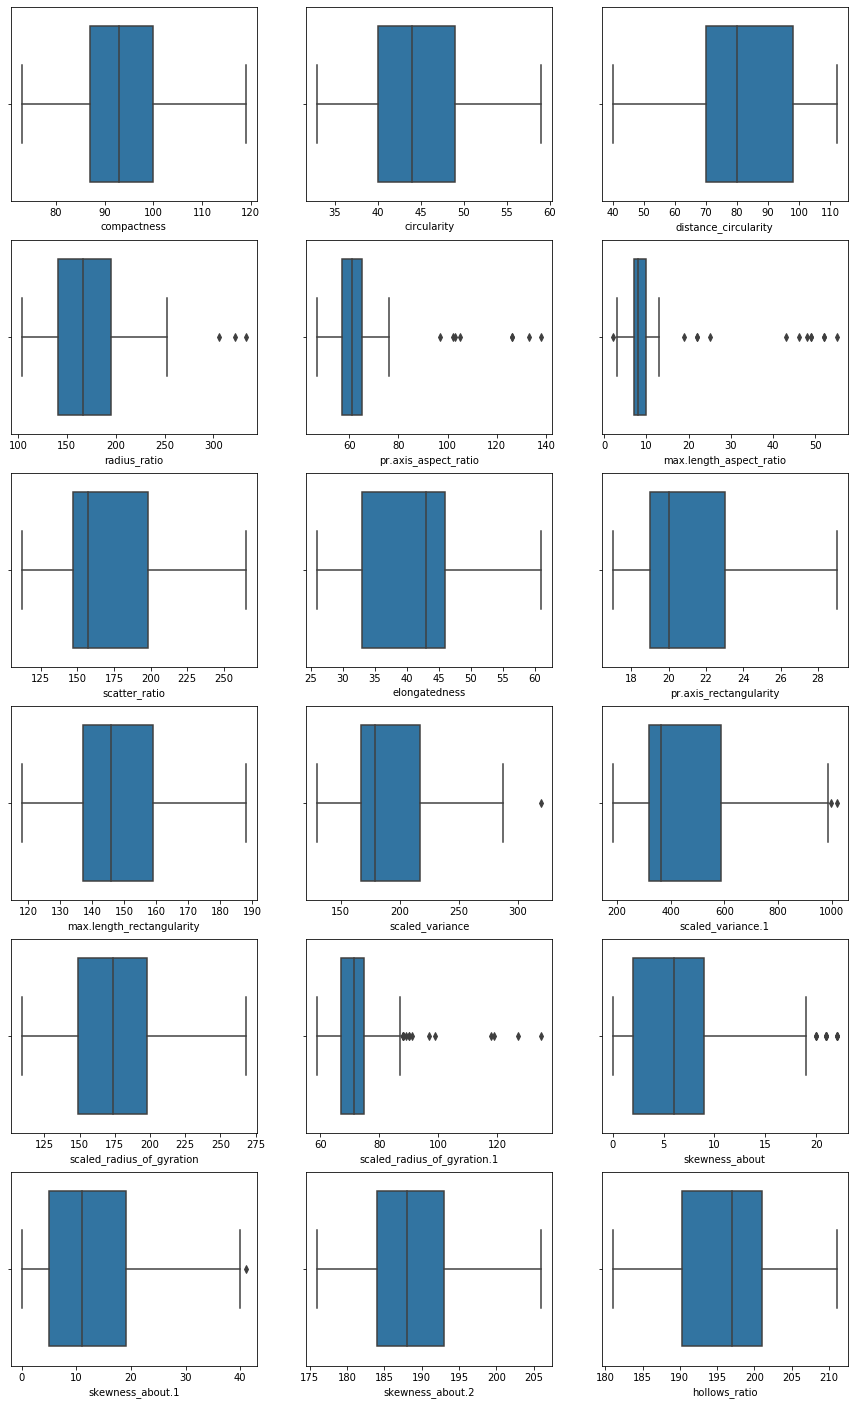

In [26]:
plt.figure(figsize=(15,25))
pos = 1
for i in X.columns:
    plt.subplot(6, 3, pos)
    sns.boxplot(X[i])
    pos += 1 

* These columns has many outliers:
> 1. radius_ratio
> 2. pr.axis_aspect_ratio
> 3. max.length_aspect_ratio
> 4. scaled_variance
> 5. scaled_variance.1
> 6. scaled_radius_of_gyration.1
> 7. skewness_about
> 8. skewness_about.1

### 3.6 Fix outliers

In [27]:
for i in X.loc[:,:]:
    q1, q2, q3 = vehicleData[i].quantile([0.25,0.5,0.75])
    IQR = q3 - q1
    a = X[i] > q3 + 1.5*IQR
    b = X[i] < q1 - 1.5*IQR
    X[i] = np.where(a, q3, X[i])
    X[i] = np.where(b, q1, X[i])

### 3.7 Verify outliers

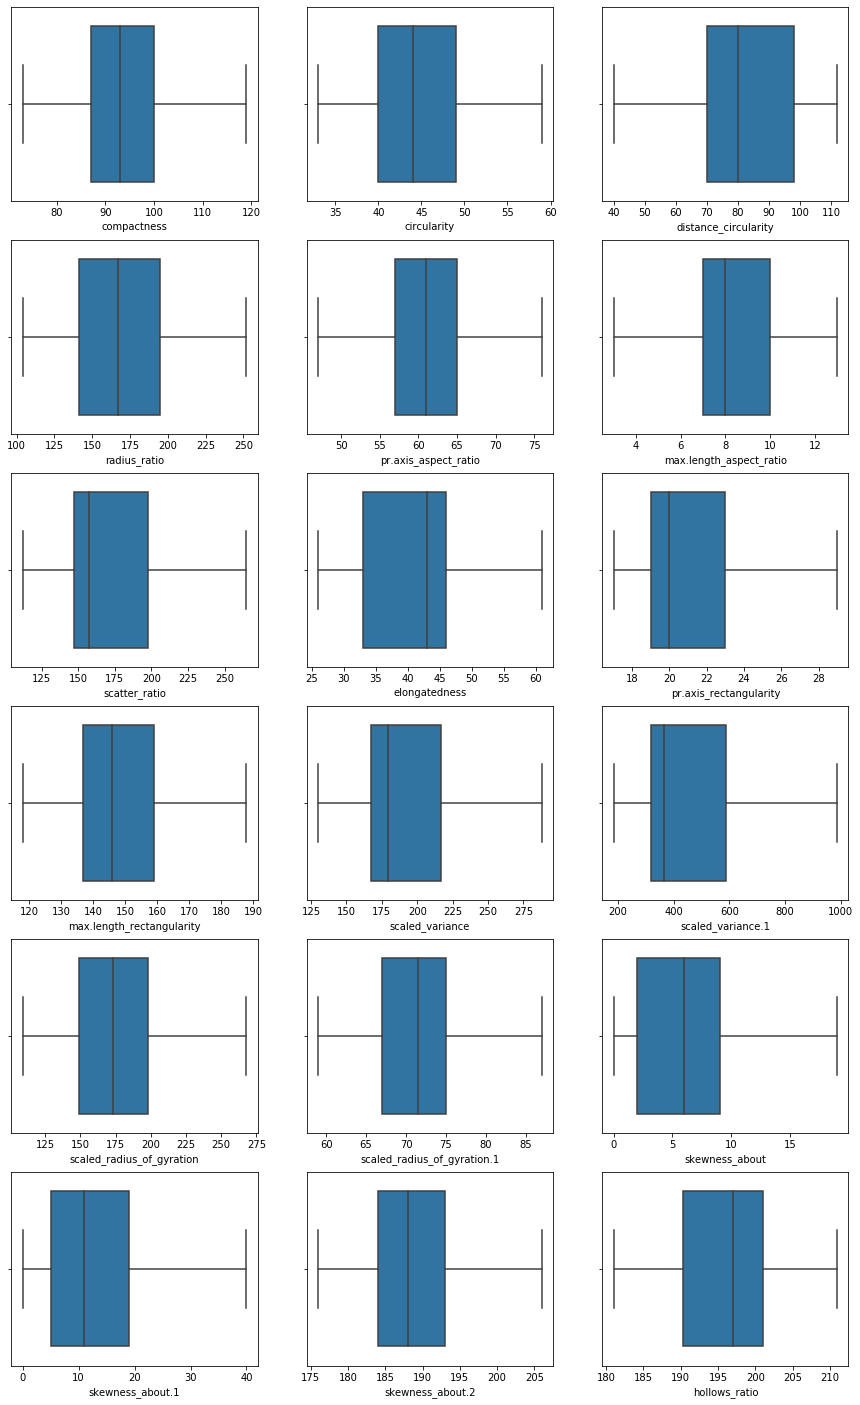

In [28]:
plt.figure(figsize=(15,25))
pos = 1
for i in X.columns:
    plt.subplot(6, 3, pos)
    sns.boxplot(X[i])
    pos += 1 

## 4. Bi-variate analysis

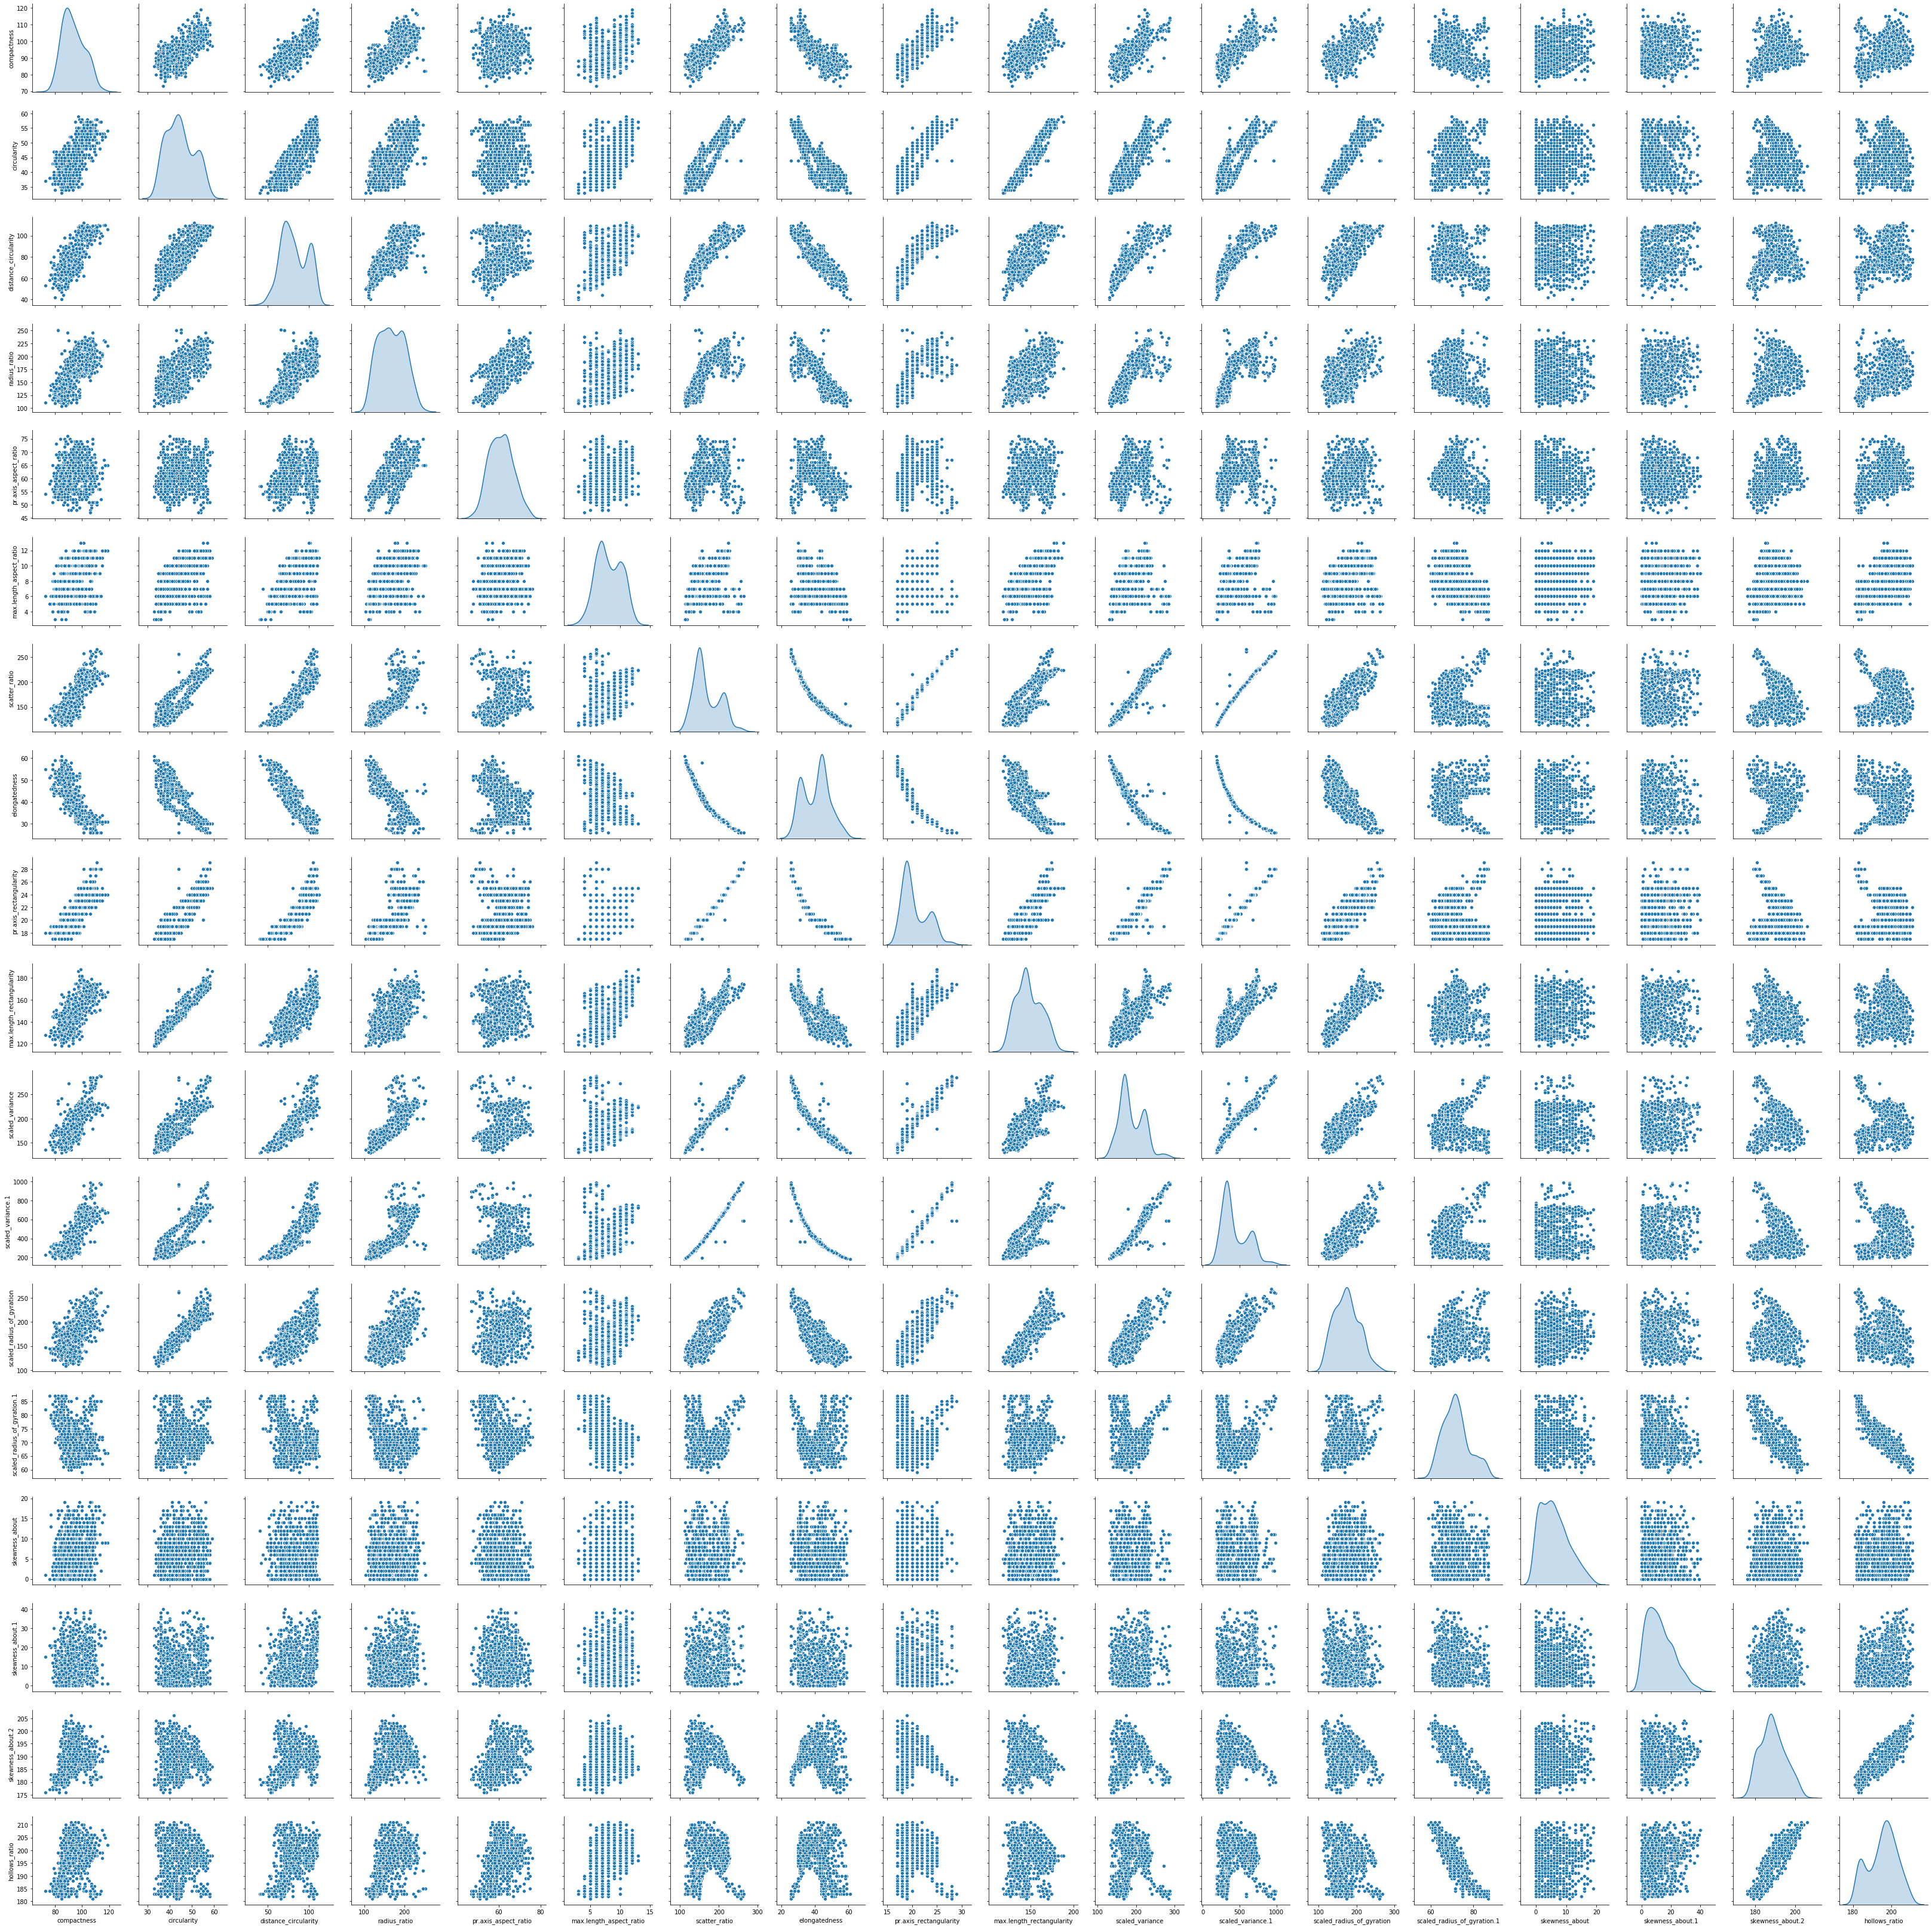

In [29]:
sns.pairplot(X, diag_kind='kde')
plt.show()

In [30]:
X.corr().mask(abs(X.corr()) <= 0.6, np.nan)

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.720046     0.638770              0.793763   
pr.axis_aspect_ratio                 NaN          NaN                   NaN   
max.length_aspect_ratio              NaN          NaN              0.657788   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.769584     0.802925              0.869464   
scaled_variance.1               0.811838     0.833435              0.887876   
scaled_radius_of_gyration            NaN     0.925816              0.705771   
scaled_radius_of_gyration.1          NaN          NaN                   NaN   
skewness_about                       NaN          NaN                   NaN   
skewness_about.1                     NaN          NaN                   NaN   
skewness_about.2                     NaN          NaN                   NaN   
hollows_ratio                        NaN          NaN                   NaN   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.720046                   NaN   
circularity                      0.638770                   NaN   
distance_circularity             0.793763                   NaN   
radius_ratio                     1.000000               0.65928   
pr.axis_aspect_ratio             0.659280               1.00000   
max.length_aspect_ratio               NaN                   NaN   
scatter_ratio                    0.767747                   NaN   
elongatedness                   -0.823444                   NaN   
pr.axis_rectangularity           0.741750                   NaN   
max.length_rectangularity             NaN                   NaN   
scaled_variance                  0.789880                   NaN   
scaled_variance.1                0.758606                   NaN   
scaled_radius_of_gyration             NaN                   NaN   
scaled_radius_of_gyration.1           NaN                   NaN   
skewness_about                        NaN                   NaN   
skewness_about.1                      NaN                   NaN   
skewness_about.2                      NaN                   NaN   
hollows_ratio                         NaN                   NaN   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                      NaN       0.812620   
circularity                                      NaN       0.847938   
distance_circularity                        0.657788       0.905076   
radius_ratio                                     NaN       0.767747   
pr.axis_aspect_ratio                             NaN            NaN   
max.length_aspect_ratio                     1.000000            NaN   
scatter_ratio                                    NaN       1.000000   
elongatedness                                    NaN      -0.971601   
pr.axis_rectangularity                           NaN       0.989751   
max.length_rectangularity                   0.640604       0.809083   
scaled_variance                                  NaN       0.959849   
scaled_variance.1                                NaN       0.988402   
scaled_radius_of_gyration                        NaN       0.799875   
scaled_radius_of_gyration.1                      NaN            NaN   
skewness_about                                   NaN            NaN   
skewness_about.1                                 NaN            NaN   
skewness_about.2                              

There ar high correlations between:
* "compactness" and :
> "circularity"<br>
> "distance_circularity"<br>
> "radius_ratio"<br>
> "scatter_ratio"<br>
> "elongatedness"<br>
> "pr.axis_rectangularity"<br>
> "max.length_rectangularity"<br>
> "scaled_variance"<br>
> "scaled_variance.1"
* "circularity" and :
> "distance_circularity"<br>
> "radius_ratio"<br>
> "scatter_ratio"<br>
> "elongatedness"<br>
> "pr.axis_rectangularity"<br>
> **"max.length_rectangularity"**<br>
> "scaled_variance"<br>
> "scaled_variance.1"<br>
> **"scaled_radius_of_gyration"**
* "distance_circularity" and :
> "radius_ratio"<br>
> "max.length_aspect_ratio"<br>
> **"scatter_ratio"**<br>
> **"elongatedness"**<br>
> "pr.axis_rectangularity"<br>
> "max.length_rectangularity"<br>
> "scaled_variance"<br>
> "scaled_variance.1"<br>
> "scaled_radius_of_gyration"
* "radius_ratio" and :
> "pr.axis_aspect_ratio"<br>
> "scatter_ratio"<br>
> "elongatedness"<br>
> "pr.axis_rectangularity"<br>
> "scaled_variance"<br>
> "scaled_variance.1"
* "max.length_aspect_ratio" and :
> "max.length_rectangularity"
* "scatter_ratio" and :
> **"elongatedness"**<br>
> **"pr.axis_rectangularity"**<br>
> "max.length_rectangularity"<br>
> **"scaled_variance"**<br>
> **"scaled_variance.1"**<br>
> "scaled_radius_of_gyration"
* "elongatedness" and :
> **"pr.axis_rectangularity"**<br>
> "max.length_rectangularity"<br>
> **"scaled_variance"**<br>
> **"scaled_variance.1"**<br>
> "scaled_radius_of_gyration"
* "pr.axis_rectangularity" and :
> "max.length_rectangularity"<br>
> **"scaled_variance"**<br>
> **"scaled_variance.1"**<br>
> "scaled_radius_of_gyration"
* "max.length_rectangularity" and :
> "scaled_variance"<br>
> "scaled_variance.1"<br>
> "scaled_radius_of_gyration"
* "scaled_variance" and :
> **"scaled_variance.1"**<br>
> "scaled_radius_of_gyration"
* "scaled_variance.1" and :
> "scaled_radius_of_gyration"
* "scaled_radius_of_gyration.1" and :
> "skewness_about.2"<br>
> **"hollows_ratio"**
* "skewness_about.2" and :
> "hollows_ratio"

## 5. Create the training set and test set in ratio of 70:30

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.shape

(592, 18)

## 6. Scale features

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

columns = X.columns
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=columns)

# 7. Perform PCA analysis

In [33]:
# Generating the covariance matrix and the eigen values for the PCA analysis
cov_matrix = np.cov(X_train_scaled.T) # the relevant covariance matrix
print('Covariance Matrix \n',cov_matrix)

# Generating the eigen values and the eigen vectors
e_vals, e_vecs = np.linalg.eig(cov_matrix)
print('\nEigenvectors \n%s' %e_vecs)
print('\nEigenvalues \n%s' %e_vals)

Covariance Matrix 
 [[ 1.00169205e+00  6.87037561e-01  7.88797596e-01  7.29659243e-01
   1.98507466e-01  4.74589911e-01  8.09135005e-01 -7.80884220e-01
   8.10943315e-01  6.86266330e-01  7.66672130e-01  8.07909725e-01
   5.92695190e-01 -2.47582619e-01  1.94491821e-01  1.47814464e-01
   2.92619813e-01  3.54097649e-01]
 [ 6.87037561e-01  1.00169205e+00  7.94441386e-01  6.53675849e-01
   2.21757306e-01  5.32673470e-01  8.46231598e-01 -8.24647920e-01
   8.39576017e-01  9.60435081e-01  8.03517884e-01  8.30311269e-01
   9.24604532e-01  6.49818963e-02  1.40450644e-01 -7.85577591e-03
  -9.99532949e-02  4.48742380e-02]
 [ 7.88797596e-01  7.94441386e-01  1.00169205e+00  8.10200360e-01
   2.58393217e-01  6.36753791e-01  9.03256103e-01 -9.12167333e-01
   8.91756653e-01  7.77899281e-01  8.67652743e-01  8.84599317e-01
   7.07991728e-01 -2.40891200e-01  8.96864473e-02  2.72006060e-01
   1.58519791e-01  3.37726110e-01]
 [ 7.29659243e-01  6.53675849e-01  8.10200360e-01  1.00169205e+00
   6.65140473e-01

In [34]:
# The "cumulative variance explained" analysis 
tot = sum(e_vals)
var_exp = [( i /tot ) * 100 for i in sorted(e_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 54.02897047  72.90754502  79.55779979  85.63698498  90.78333435
  94.50306153  96.22820011  97.46147943  98.13259251  98.56136491
  98.94606585  99.27072119  99.45596049  99.62714791  99.76339156
  99.88009626  99.97154242 100.        ]


> We can reduce to 7 PCA dimensions, which covers more than 95% variance

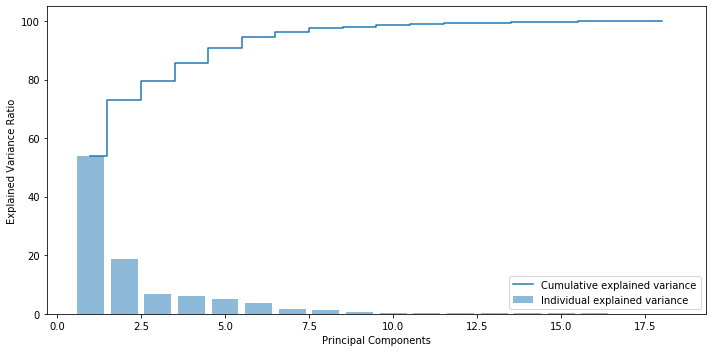

In [35]:
# Plotting the variance expalained by the principal components and the cumulative variance explained.
plt.figure(figsize=(10 , 5))
plt.bar(range(1, e_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, e_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

## 8. Use PCA command from sklearn

In [36]:
# Using scikit learn PCA here. It does all the above steps and maps data to PCA dimensions in one shot
from sklearn.decomposition import PCA

# NOTE - we are generating only 7 PCA dimensions (dimensionality reduction from 18 to 7)
pca = PCA(n_components=7)
pca.fit(X_train_scaled)

PCA(copy=True, iterated_power='auto', n_components=7, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

### 8.1 The eigenvalues

In [37]:
print(pca.explained_variance_)

[9.74167021 3.40389324 1.19907132 1.09610486 0.9279103  0.6706838
 0.31105037]


### 8.2 The eigenvectors

In [38]:
print(pca.components_)

[[ 0.27193831  0.28746056  0.30242854  0.27342739  0.10144602  0.18412482
   0.31059779 -0.30924764  0.3073224   0.27866526  0.30025228  0.30650885
   0.26494738 -0.04103537  0.03528463  0.05973954  0.03719114  0.0813239 ]
 [-0.0826668   0.12396219 -0.05383545 -0.195819   -0.25999987 -0.12496112
   0.07612096 -0.01317805  0.08814571  0.11523741  0.0814649   0.08011513
   0.21192714  0.50583277  0.00870671 -0.09928074 -0.49568004 -0.5068112 ]
 [-0.0237686  -0.19992183  0.08888559 -0.00889497 -0.22499383 -0.07298512
   0.1095505  -0.07510007  0.1136238  -0.19348368  0.12441216  0.1083711
  -0.20657459  0.03512747 -0.46591151  0.7305255  -0.07343885 -0.01690805]
 [-0.15042919 -0.01263009 -0.09630019  0.25664417  0.57542963 -0.33704282
   0.02180343 -0.08988476 -0.00278707 -0.10426891  0.10217631  0.02923303
   0.04626129  0.12405423 -0.57013532 -0.26868968  0.01679139 -0.10754312]
 [ 0.12955659 -0.14977416 -0.06848095  0.12024282  0.11272923 -0.62921599
   0.08434631 -0.06731327  0.084765

### 8.3 Percentage of variation explained by each eigenvector

In [39]:
print(pca.explained_variance_ratio_)

[0.5402897  0.18878575 0.06650255 0.06079185 0.05146349 0.03719727
 0.01725139]


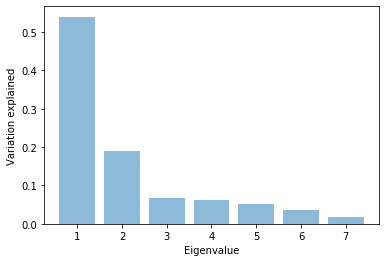

In [40]:
plt.bar(list(range(1,8)),pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('Eigenvalue')
plt.show()

In [41]:
cum_var_exp = np.cumsum(pca.explained_variance_ratio_)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [0.5402897  0.72907545 0.795578   0.85636985 0.90783334 0.94503062
 0.962282  ]


### 8.4 Transform data to components formed

In [42]:
columns = ['pca_%i' % i for i in range(7)]
X_train_scaled_pca = pd.DataFrame(pca.transform(X_train_scaled), columns=columns, index=X_train_scaled.index)
X_test_scaled_pca = pd.DataFrame(pca.transform(X_test_scaled), columns=columns, index=X_test_scaled.index)
X_train_scaled_pca.shape

(592, 7)

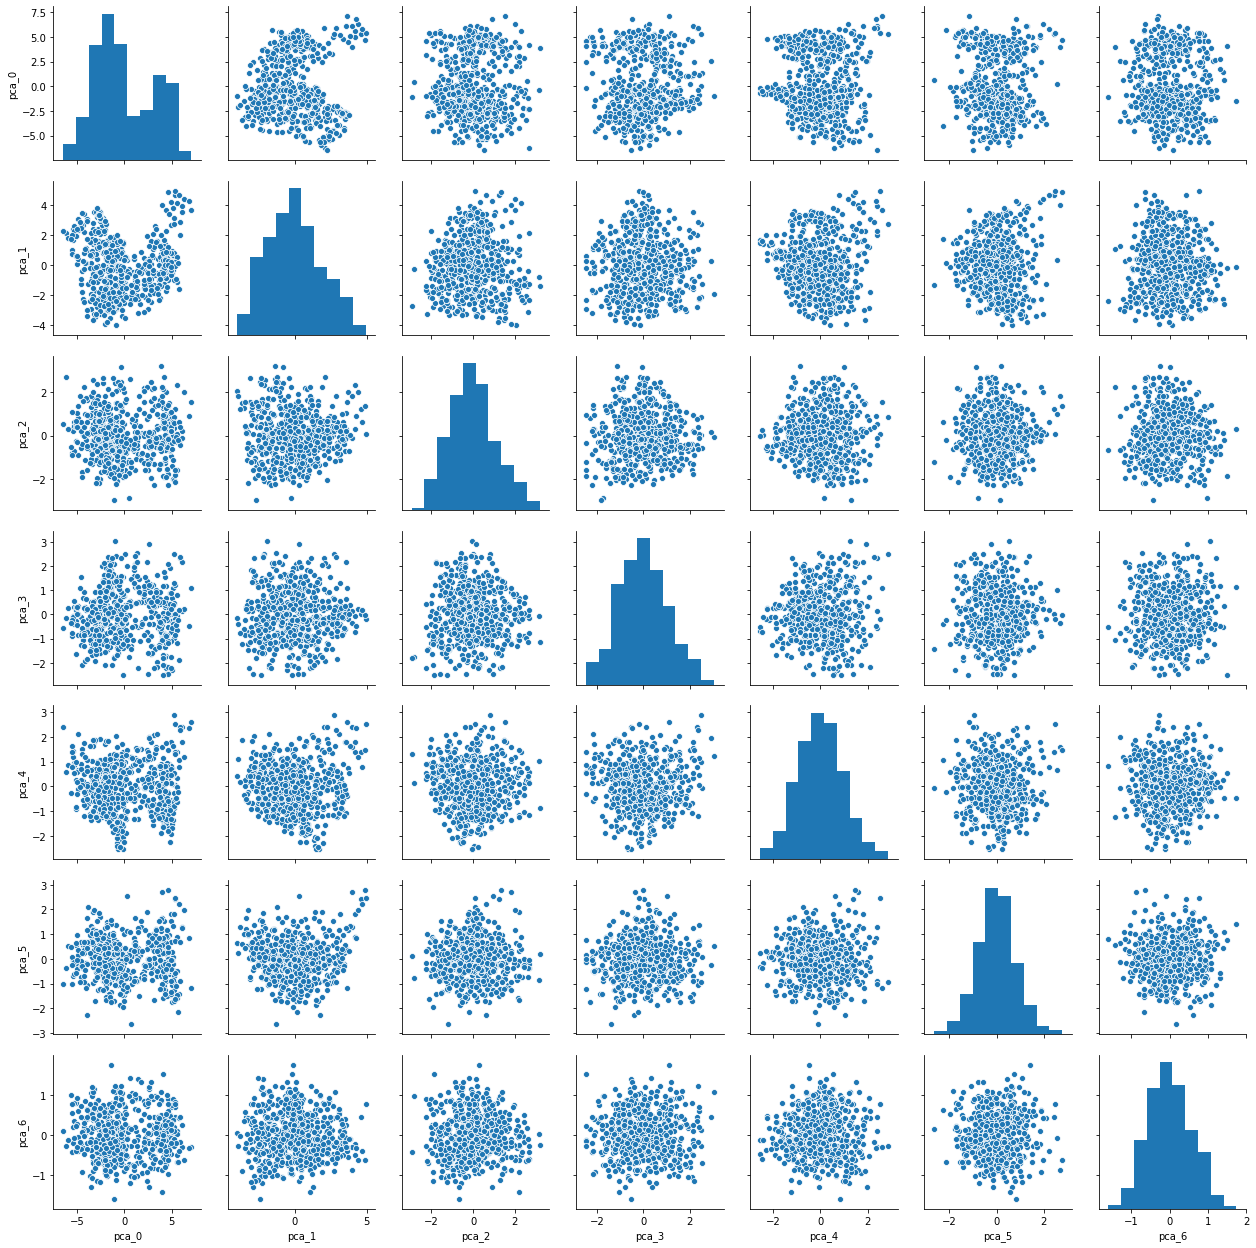

In [43]:
sns.pairplot(pd.DataFrame(X_train_scaled_pca))

In [44]:
X_train_scaled_pca.corr().mask(abs(X_train_scaled_pca.corr()) <= 0.6, np.nan)

pca_0  pca_1  pca_2  pca_3  pca_4  pca_5  pca_6
pca_0    1.0    NaN    NaN    NaN    NaN    NaN    NaN
pca_1    NaN    1.0    NaN    NaN    NaN    NaN    NaN
pca_2    NaN    NaN    1.0    NaN    NaN    NaN    NaN
pca_3    NaN    NaN    NaN    1.0    NaN    NaN    NaN
pca_4    NaN    NaN    NaN    NaN    1.0    NaN    NaN
pca_5    NaN    NaN    NaN    NaN    NaN    1.0    NaN
pca_6    NaN    NaN    NaN    NaN    NaN    NaN    1.0

> All new 7 PCA components are independent columns.

## 9. Use Support vector machines + Grid search + Cross validation

In [45]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

K=5
parameters = [{'kernel': ['linear', 'rbf'], 'C': [0.01, 0.05, 0.5, 1]}]

### 9.1 Without PCA

In [46]:
svc_grid = GridSearchCV(SVC(), parameters, cv=K)
svc_grid.fit(X_train_scaled, y_train)
print("X_train_scaled svc_grid acc:" + str(svc_grid.score(X_train_scaled, y_train)))
print("X_test_scaled svc_grid acc:" + str(svc_grid.score(X_test_scaled, y_test)))
print("svc_grid.best_params_: " + str(svc_grid.best_params_))

X_train_scaled svc_grid acc:0.9628378378378378
X_test_scaled svc_grid acc:0.9409448818897638
svc_grid.best_params_: {'C': 0.5, 'kernel': 'rbf'}


### 9.2 With PCA

In [47]:
svc_pca_grid = GridSearchCV(SVC(), parameters, cv=K)
svc_pca_grid.fit(X_train_scaled_pca, y_train)
print("X_train_scaled_pca svc_pca_grid acc:" + str(svc_pca_grid.score(X_train_scaled_pca, y_train)))
print("X_test_scaled_pca svc_pca_grid acc:" + str(svc_pca_grid.score(X_test_scaled_pca, y_test)))
print("svc_pca_grid.best_params_: " + str(svc_pca_grid.best_params_))

X_train_scaled_pca svc_pca_grid acc:0.9628378378378378
X_test_scaled_pca svc_pca_grid acc:0.9409448818897638
svc_pca_grid.best_params_: {'C': 1, 'kernel': 'rbf'}


C:\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


> Suprisingly, both SVC with and without PCA has the same accuracy, but PCA has much less number of columns.